# **Computational Drug Discovery**

##**Building QSAR - Quantitative Structured Activity Relationship (ML model)**

### **Installing Libraries**

**ChEMBL database** - The ChEMBL Database is a database that contains curated bioactivity data of more than 2.4 million compounds. It is compiled from more than 90,000 documents, 1.6 million assays and the data spans 15,000 targets and 2000 cells and 48,000 indications. [Data as of March 25, 2024; ChEMBL version 34].

In [1]:
!pip install chembl_webresource_client # to download bioactivity data
!pip install matplotlib-venn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 565.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 998.8 kB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 614.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 7.1 MB/s eta 0:00:0000:0100:01m


In [67]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import Descriptors,Lipinski
from warnings import filterwarnings
filterwarnings('ignore')

ModuleNotFoundError: No module named 'chembl_webresource_client'

## Search target protein for **Alzheimer's Spectrum Disorder**

In [71]:
target=new_client.target
target_query=target.search('alzheimer')
targets=pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,13.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'Q92542', 'xref_name': None, 'xre...",Homo sapiens,Nicastrin,11.0,False,CHEMBL3418,"[{'accession': 'Q92542', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Gamma-secretase,11.0,False,CHEMBL2094135,"[{'accession': 'Q96BI3', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Rattus norvegicus,Amyloid-beta A4 protein,9.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Mus musculus,Amyloid-beta A4 protein,8.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090
5,"[{'xref_id': 'P05067', 'xref_name': None, 'xre...",Homo sapiens,Amyloid-beta A4 protein,7.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


### Selecting and retriving bioactivity data for **Gamma-secretase**

In [5]:
selected_target= targets.target_chembl_id[2]
selected_target

'CHEMBL2094135'

Here, we will retrieve only bioactivity data for Gamma-secretase(CHEMBL2094135) that are reported as IC 50  values in nM (nanomolar) unit.

In [6]:
activity=new_client.activity
res=activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')

In [7]:
df=pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,306061,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,...,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,1.8
1,None,None,306062,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,...,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,0.9
2,None,None,307380,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,...,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,13.2
3,None,None,311377,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,...,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,1.2
4,None,None,312782,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,...,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,1884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776270,[],CHEMBL5128143,Inhibition of gamma-secretase (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,15.0
3533,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776277,[],CHEMBL5128150,Inhibition of gamma secretase derived from hum...,B,None,None,BAO_0000190,...,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,6.2
3534,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776284,[],CHEMBL5128157,Inhibition of gamma-secretase (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,0.27
3535,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24998181,[],CHEMBL5232262,Inhibition of gamma-secretase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Gamma-secretase,9606,None,None,IC50,uM,UO_0000065,None,25.0


In [8]:
pd.set_option('display.max_columns',None)

In [9]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,306061,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,BAO_0000223,protein complex format,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,None,None,CHEMBL1145882,Bioorg Med Chem Lett,2003,"{'bei': '18.31', 'le': '0.34', 'lle': '4.94', ...",CHEMBL336071,None,CHEMBL336071,8.74,0,http://www.openphacts.org/units/Nanomolar,254693,=,1,1,=,None,IC50,nM,None,1.8,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,1.8
1,None,None,306062,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,BAO_0000223,protein complex format,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,None,None,CHEMBL1145882,Bioorg Med Chem Lett,2003,"{'bei': '17.34', 'le': '0.33', 'lle': '5.86', ...",CHEMBL336813,None,CHEMBL336813,9.05,0,http://www.openphacts.org/units/Nanomolar,254689,=,1,1,=,None,IC50,nM,None,0.9,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,0.9
2,None,None,307380,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,BAO_0000223,protein complex format,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,None,None,CHEMBL1145882,Bioorg Med Chem Lett,2003,"{'bei': '14.74', 'le': '0.28', 'lle': '5.20', ...",CHEMBL334594,None,CHEMBL334594,7.88,0,http://www.openphacts.org/units/Nanomolar,254686,=,1,1,=,None,IC50,nM,None,13.2,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,13.2
3,None,None,311377,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,BAO_0000223,protein complex format,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,None,None,CHEMBL1145882,Bioorg Med Chem Lett,2003,"{'bei': '17.30', 'le': '0.32', 'lle': '4.71', ...",CHEMBL133237,None,CHEMBL133237,8.92,0,http://www.openphacts.org/units/Nanomolar,254695,=,1,1,=,None,IC50,nM,None,1.2,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,1.2
4,None,None,312782,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,BAO_0000223,protein complex format,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,None,None,CHEMBL1145882,Bioorg Med Chem Lett,2003,"{'bei': '10.79', 'le': '0.20', 'lle': '1.99', ...",CHEMBL132900,None,CHEMBL132900,5.72,0,http://www.openphacts.org/units/Nanomolar,254697,=,1,1,=,None,IC50,nM,None,1884.0,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,1884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776270,[],CHEMBL5128143,Inhibition of gamma-secretase (unknown origin)...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=S(=O)(N[C@H](CO)C(C(F)(F)F)C(F)(F)F)c1ccc(Cl)s1,None,None,CHEMBL5126536,Eur J Med Chem,2022,"{'bei': '19.97', 'le': '0.49', 'lle': '5.04', ...",CHEMBL463981,BEGACESTAT,CHEMBL463981,7.82,1,http://www.openphacts.org/units/Nanomolar,3866550,=,1,1,=,None,IC50,nM,None,15.0,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,15.0
3533,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776277,[],CHEMBL5128150,Inhibition of gamma secretase 

## Saving bioactivity data into CSV file

In [11]:
df.to_csv('bioactivity_data_Gamma-secretase.csv',index=False)

In [12]:
df.head(2)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,306061,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,BAO_0000223,protein complex format,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,None,None,CHEMBL1145882,Bioorg Med Chem Lett,2003,"{'bei': '18.31', 'le': '0.34', 'lle': '4.94', ...",CHEMBL336071,None,CHEMBL336071,8.74,0,http://www.openphacts.org/units/Nanomolar,254693,=,1,1,=,None,IC50,nM,None,1.8,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,1.8
1,None,None,306062,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,BAO_0000223,protein complex format,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,None,None,CHEMBL1145882,Bioorg Med Chem Lett,2003,"{'bei': '17.34', 'le': '0.33', 'lle': '5.86', ...",CHEMBL336813,None,CHEMBL336813,9.05,0,http://www.openphacts.org/units/Nanomolar,254689,=,1,1,=,None,IC50,nM,None,0.9,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,0.9


In [13]:
df.shape

(3537, 46)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   action_type                155 non-null    object
 1   activity_comment           30 non-null     object
 2   activity_id                3537 non-null   int64 
 3   activity_properties        3537 non-null   object
 4   assay_chembl_id            3537 non-null   object
 5   assay_description          3537 non-null   object
 6   assay_type                 3537 non-null   object
 7   assay_variant_accession    0 non-null      object
 8   assay_variant_mutation     0 non-null      object
 9   bao_endpoint               3537 non-null   object
 10  bao_format                 3537 non-null   object
 11  bao_label                  3537 non-null   object
 12  canonical_smiles           3537 non-null   object
 13  data_validity_comment      13 non-null     object
 14  data_val

Summary of dataset

In [15]:
df.describe()

,activity_id,document_year,potential_duplicate,record_id,src_id,standard_flag
count,3.537000e+03,3537.000000,3537.000000,3.537000e+03,3537.0,3537.000000
mean,8.661536e+06,2011.172463,0.026011,1.542737e+06,1.0,0.991518
std,6.918890e+06,4.411677,0.159190,9.703336e+05,0.0,0.091718
min,3.060610e+05,2003.000000,0.000000,2.388700e+04,1.0,0.000000
25%,2.047099e+06,2007.000000,0.000000,6.793160e+05,1.0,1.000000
50%,6.320996e+06,2011.000000,0.000000,1.446481e+06,1.0,1.000000
75%,1.397144e+07,2013.000000,0.000000,1.976554e+06,1.0,1.000000
max,2.507637e+07,2022.000000,1.000000,3.930715e+06,1.0,1.000000


## Data Cleaning

Handling Null Values

In [16]:
df.isnull().sum()

action_type                  3382
activity_comment             3507
activity_id                     0
activity_properties             0
assay_chembl_id                 0
assay_description               0
assay_type                      0
assay_variant_accession      3537
assay_variant_mutation       3537
bao_endpoint                    0
bao_format                      0
bao_label                       0
canonical_smiles                0
data_validity_comment        3524
data_validity_description    3524
document_chembl_id              0
document_journal                0
document_year                   0
ligand_efficiency             523
molecule_chembl_id              0
molecule_pref_name           3465
parent_molecule_chembl_id       0
pchembl_value                 390
potential_duplicate             0
qudt_units                     29
record_id                       0
relation                       30
src_id                          0
standard_flag                   0
standard_relat

Dropping null values from standard_value

In [17]:
df1=df.drop(['action_type','activity_comment','assay_variant_accession','assay_variant_mutation','data_validity_comment','data_validity_description','molecule_pref_name','standard_text_value','standard_upper_value','text_value','toid','upper_value'],axis=1)

In [18]:
df1.isnull().sum()

activity_id                    0
activity_properties            0
assay_chembl_id                0
assay_description              0
assay_type                     0
bao_endpoint                   0
bao_format                     0
bao_label                      0
canonical_smiles               0
document_chembl_id             0
document_journal               0
document_year                  0
ligand_efficiency            523
molecule_chembl_id             0
parent_molecule_chembl_id      0
pchembl_value                390
potential_duplicate            0
qudt_units                    29
record_id                      0
relation                      30
src_id                         0
standard_flag                  0
standard_relation             30
standard_type                  0
standard_units                29
standard_value                30
target_chembl_id               0
target_organism                0
target_pref_name               0
target_tax_id                  0
type      

In [19]:
df2= df1.dropna(subset=['standard_value'])


In [20]:
df2[df2.standard_value.isnull()]

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_type,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value


## Data pre-processing

## Labeling compounds as either being active, inactive or intermediate



The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [21]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [22]:
df2['bioactivity_class']=bioactivity_class

In [23]:
df2

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_type,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value,bioactivity_class
0,306061,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,BAO_0000190,BAO_0000223,protein complex format,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,CHEMBL1145882,Bioorg Med Chem Lett,2003,"{'bei': '18.31', 'le': '0.34', 'lle': '4.94', ...",CHEMBL336071,CHEMBL336071,8.74,0,http://www.openphacts.org/units/Nanomolar,254693,=,1,1,=,IC50,nM,1.8,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,IC50,nM,UO_0000065,1.8,active
1,306062,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,BAO_0000190,BAO_0000223,protein complex format,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,CHEMBL1145882,Bioorg Med Chem Lett,2003,"{'bei': '17.34', 'le': '0.33', 'lle': '5.86', ...",CHEMBL336813,CHEMBL336813,9.05,0,http://www.openphacts.org/units/Nanomolar,254689,=,1,1,=,IC50,nM,0.9,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,IC50,nM,UO_0000065,0.9,active
2,307380,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,BAO_0000190,BAO_0000223,protein complex format,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,CHEMBL1145882,Bioorg Med Chem Lett,2003,"{'bei': '14.74', 'le': '0.28', 'lle': '5.20', ...",CHEMBL334594,CHEMBL334594,7.88,0,http://www.openphacts.org/units/Nanomolar,254686,=,1,1,=,IC50,nM,13.2,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,IC50,nM,UO_0000065,13.2,active
3,311377,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,BAO_0000190,BAO_0000223,protein complex format,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,CHEMBL1145882,Bioorg Med Chem Lett,2003,"{'bei': '17.30', 'le': '0.32', 'lle': '4.71', ...",CHEMBL133237,CHEMBL133237,8.92,0,http://www.openphacts.org/units/Nanomolar,254695,=,1,1,=,IC50,nM,1.2,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,IC50,nM,UO_0000065,1.2,active
4,312782,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,BAO_0000190,BAO_0000223,protein complex format,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,CHEMBL1145882,Bioorg Med Chem Lett,2003,"{'bei': '10.79', 'le': '0.20', 'lle': '1.99', ...",CHEMBL132900,CHEMBL132900,5.72,0,http://www.openphacts.org/units/Nanomolar,254697,=,1,1,=,IC50,nM,1884.0,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,IC50,nM,UO_0000065,1884.0,intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,24776270,[],CHEMBL5128143,Inhibition of gamma-secretase (unknown origin)...,B,BAO_0000190,BAO_0000219,cell-based format,O=S(=O)(N[C@H](CO)C(C(F)(F)F)C(F)(F)F)c1ccc(Cl)s1,CHEMBL5126536,Eur J Med Chem,2022,"{'bei': '19.97', 'le': '0.49', 'lle': '5.04', ...",CHEMBL463981,CHEMBL463981,7.82,1,http://www.openphacts.org/units/Nanomolar,3866550,=,1,1,=,IC50,nM,15.0,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,IC50,nM,UO_0000065,15.0,active
3533,24776277,[],CHEMBL5128150,Inhibition of gamma secretase derived from hum...,B,BAO_0000190,BAO_0000249,cell membrane format,Cc1cn(-c2ccc3n(c2=O)CCN([C@@H](C)[C@@H]2CC[C@H...,CHEMBL5126536,Eur J Med Chem,2022,"{'bei': '15.23', 'le': '0.30', 'lle': '3.29', ...",CHEMBL3951810,CHEMBL3951810,8.21,0,http://www.openphacts.org/units/Nanomolar,3866551,=,1,1,=,IC50,nM,6.2,CHEMBL2094135,Homo sapiens,Gamma-secretase,9606,IC50,nM,UO_0000065,6.2,active
3534,24776284,[],CHEMBL5128157,Inhibition of gamma-secretase (unknown origin)...,B,BAO_0000190,BAO_0000223,protein complex format,CC(C)[C@H](O)C(=O)N[C@@H](C)C(=O)N[C@@H]1C(=O)...,CHEMBL5126536,Eur J Med Chem,2022,"{'bei': '23.37', 'le': '0.44', 'lle': '7.56', ...",CHEMBL44

## Selection of 4 bioactivity features

In [24]:
selection=['molecule_chembl_id','canonical_smiles','standard_value','bioactivity_class']

In [25]:
df3=df2[selection]

In [26]:
df3

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL336071,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.8,active
1,CHEMBL336813,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,0.9,active
2,CHEMBL334594,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,13.2,active
3,CHEMBL133237,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.2,active
4,CHEMBL132900,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1884.0,intermediate
...,...,...,...,...
3532,CHEMBL463981,O=S(=O)(N[C@H](CO)C(C(F)(F)F)C(F)(F)F)c1ccc(Cl)s1,15.0,active
3533,CHEMBL3951810,Cc1cn(-c2ccc3n(c2=O)CCN([C@@H](C)[C@@H]2CC[C@H...,6.2,active
3534,CHEMBL4436451,CC(C)[C@H](O)C(=O)N[C@@H](C)C(=O)N[C@@H]1C(=O)...,0.27,active
3535,CHEMBL601773,CC(C)[C@@]1(NC(=O)[C@@H]2C[C@@H]3c4cccc5[nH]cc...,25000.0,inactive


In [28]:
df3.to_csv('bioactivity preprocessed data.csv',index=False)

## Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton

Octanol-water partition coefficient (LogP) < 5

Hydrogen bond donors < 5

Hydrogen bond acceptors < 10

### Calculate Descriptor 

In [37]:
def lipinski(smiles,verbose=False):

    moldata=[]
    for i in smiles:
        mol=Chem.MolFromSmiles(i)
        moldata.append(mol)

    basedata=[]
    j=0
    for mol in moldata:
        desc_MolWTt=Descriptors.MolWt(mol)
        desc_MolLogp=Descriptors.MolLogP(mol)
        desc_NumHDonors=Lipinski.NumHDonors(mol)
        desc_NumHAcceptors=Lipinski.NumHAcceptors(mol)

        row=[desc_MolWTt,desc_MolLogp,desc_NumHDonors,desc_NumHAcceptors]

        basedata.append(row)

    if basedata:
        basedata = np.array(basedata)
    else:
        return pd.DataFrame(columns=['MW', 'LogP', 'NumHDonors', 'NumHAcceptors'])


    ColumnNames=['MW','LogP','NumHDonors','NumHAcceptors']
    descriptors=pd.DataFrame(basedata,columns=ColumnNames)

    return descriptors



In [38]:
df_lipinski=lipinski(df3.canonical_smiles)

In [39]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,477.467,3.80410,2.0,5.0
1,521.520,3.19090,2.0,6.0
2,534.519,2.68390,2.0,6.0
3,515.516,4.20610,1.0,5.0
4,530.575,3.72780,1.0,4.0
...,...,...,...,...
3502,391.742,2.78150,2.0,4.0
3503,538.929,4.91832,0.0,6.0
3504,409.486,2.00890,3.0,4.0
3505,611.743,2.71720,3.0,6.0


In [64]:
df3

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL336071,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.8,active
1,CHEMBL336813,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,0.9,active
2,CHEMBL334594,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,13.2,active
3,CHEMBL133237,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.2,active
4,CHEMBL132900,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1884.0,intermediate
...,...,...,...,...
3532,CHEMBL463981,O=S(=O)(N[C@H](CO)C(C(F)(F)F)C(F)(F)F)c1ccc(Cl)s1,15.0,active
3533,CHEMBL3951810,Cc1cn(-c2ccc3n(c2=O)CCN([C@@H](C)[C@@H]2CC[C@H...,6.2,active
3534,CHEMBL4436451,CC(C)[C@H](O)C(=O)N[C@@H](C)C(=O)N[C@@H]1C(=O)...,0.27,active
3535,CHEMBL601773,CC(C)[C@@]1(NC(=O)[C@@H]2C[C@@H]3c4cccc5[nH]cc...,25000.0,inactive


### Combining both bioactivity preprocessed data and lipinski data

In [41]:
df_combined=pd.concat([df3,df_lipinski],axis=1)

In [42]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL336071,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.8,active,477.467,3.80410,2.0,5.0
1,CHEMBL336813,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,0.9,active,521.520,3.19090,2.0,6.0
2,CHEMBL334594,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,13.2,active,534.519,2.68390,2.0,6.0
3,CHEMBL133237,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.2,active,515.516,4.20610,1.0,5.0
4,CHEMBL132900,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1884.0,intermediate,530.575,3.72780,1.0,4.0
...,...,...,...,...,...,...,...,...
2970,NaN,NaN,NaN,NaN,356.433,3.66272,1.0,6.0
2978,NaN,NaN,NaN,NaN,382.427,3.87082,2.0,6.0
2983,NaN,NaN,NaN,NaN,401.474,3.75042,2.0,8.0
2989,NaN,NaN,NaN,NaN,395.908,4.41770,1.0,3.0


In [43]:
df4= df_combined.dropna(subset=['standard_value'])
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL336071,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.8,active,477.467,3.8041,2.0,5.0
1,CHEMBL336813,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,0.9,active,521.520,3.1909,2.0,6.0
2,CHEMBL334594,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,13.2,active,534.519,2.6839,2.0,6.0
3,CHEMBL133237,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.2,active,515.516,4.2061,1.0,5.0
4,CHEMBL132900,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1884.0,intermediate,530.575,3.7278,1.0,4.0
...,...,...,...,...,...,...,...,...
3532,CHEMBL463981,O=S(=O)(N[C@H](CO)C(C(F)(F)F)C(F)(F)F)c1ccc(Cl)s1,15.0,active,NaN,NaN,NaN,NaN
3533,CHEMBL3951810,Cc1cn(-c2ccc3n(c2=O)CCN([C@@H](C)[C@@H]2CC[C@H...,6.2,active,NaN,NaN,NaN,NaN
3534,CHEMBL4436451,CC(C)[C@H](O)C(=O)N[C@@H](C)C(=O)N[C@@H]1C(=O)...,0.27,active,NaN,NaN,NaN,NaN
3535,CHEMBL601773,CC(C)[C@@]1(NC(=O)[C@@H]2C[C@@H]3c4cccc5[nH]cc...,25000.0,inactive,NaN,NaN,NaN,NaN


In [46]:
df5= df4.dropna(subset=['NumHDonors'])
df5

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL336071,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.8,active,477.467,3.80410,2.0,5.0
1,CHEMBL336813,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,0.9,active,521.520,3.19090,2.0,6.0
2,CHEMBL334594,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,13.2,active,534.519,2.68390,2.0,6.0
3,CHEMBL133237,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.2,active,515.516,4.20610,1.0,5.0
4,CHEMBL132900,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1884.0,intermediate,530.575,3.72780,1.0,4.0
...,...,...,...,...,...,...,...,...
3502,CHEMBL4850178,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,58.0,active,391.742,2.78150,2.0,4.0
3503,CHEMBL4853450,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,0.8,active,538.929,4.91832,0.0,6.0
3504,CHEMBL4851959,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,4.35,active,409.486,2.00890,3.0,4.0
3505,CHEMBL4874349,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,1.88,active,611.743,2.71720,3.0,6.0


### Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9 
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [50]:
import numpy as np

def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i * (10**-9)
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)  # Use axis=1 for clarity

    return x


In [51]:
df5.standard_value.describe()

count        3477
unique       1130
top       10000.0
freq           92
Name: standard_value, dtype: object

In [55]:
def norm_value(input):
    norm = []

    for value in input['standard_value']:
        try:
            i = float(value)
            if i > 100000000:
                i = 100000000
            norm.append(i)
        except ValueError:
            # Handle the case where the value is not a number
            print(f"Warning: '{value}' is not a number and will be skipped.")
            continue

    input['standard_value_norm'] = norm

    return input

#### We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [56]:
df_norm=norm_value(df5)
df_norm

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL336071,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.8,active,477.467,3.80410,2.0,5.0,1.80
1,CHEMBL336813,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,0.9,active,521.520,3.19090,2.0,6.0,0.90
2,CHEMBL334594,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,13.2,active,534.519,2.68390,2.0,6.0,13.20
3,CHEMBL133237,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.2,active,515.516,4.20610,1.0,5.0,1.20
4,CHEMBL132900,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1884.0,intermediate,530.575,3.72780,1.0,4.0,1884.00
...,...,...,...,...,...,...,...,...,...
3502,CHEMBL4850178,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,58.0,active,391.742,2.78150,2.0,4.0,58.00
3503,CHEMBL4853450,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,0.8,active,538.929,4.91832,0.0,6.0,0.80
3504,CHEMBL4851959,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,4.35,active,409.486,2.00890,3.0,4.0,4.35
3505,CHEMBL4874349,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,1.88,active,611.743,2.71720,3.0,6.0,1.88


In [57]:
df_norm.standard_value_norm.describe()

count      3477.000000
mean       6089.511535
std       19056.743081
min           0.002000
25%          20.800000
50%         150.000000
75%        1630.000000
max      332000.000000
Name: standard_value_norm, dtype: float64

In [58]:
df_pIC50=pIC50(df_norm)
df_pIC50

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL336071,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.8,active,477.467,3.80410,2.0,5.0,8.744727
1,CHEMBL336813,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,0.9,active,521.520,3.19090,2.0,6.0,9.045757
2,CHEMBL334594,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,13.2,active,534.519,2.68390,2.0,6.0,7.879426
3,CHEMBL133237,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.2,active,515.516,4.20610,1.0,5.0,8.920819
4,CHEMBL132900,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1884.0,intermediate,530.575,3.72780,1.0,4.0,5.724919
...,...,...,...,...,...,...,...,...,...
3502,CHEMBL4850178,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,58.0,active,391.742,2.78150,2.0,4.0,7.236572
3503,CHEMBL4853450,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,0.8,active,538.929,4.91832,0.0,6.0,9.096910
3504,CHEMBL4851959,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,4.35,active,409.486,2.00890,3.0,4.0,8.361511
3505,CHEMBL4874349,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,1.88,active,611.743,2.71720,3.0,6.0,8.725842


In [59]:
df_pIC50.pIC50.describe()

count    3477.000000
mean        6.744576
std         1.370622
min         3.478862
25%         5.787812
50%         6.823909
75%         7.681937
max        11.698970
Name: pIC50, dtype: float64

In [60]:
df_pIC50[df_pIC50.bioactivity_class=='intermediate']

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
4,CHEMBL132900,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1884.0,intermediate,530.575,3.72780,1.0,4.0,5.724919
18,CHEMBL18997,CCOC(=O)[C@H](O)[C@H](CC1CCCCC1)NC(=O)[C@@H](N...,5000.0,intermediate,458.599,3.21980,3.0,5.0,5.301030
25,CHEMBL273785,CCOC(=O)[C@H](O)[C@H](CC1CCCCC1)NC(=O)[C@H](CC...,1500.0,intermediate,440.625,3.33270,3.0,5.0,5.823909
29,CHEMBL19213,CCOC(=O)[C@H](O)[C@H](CC1CCCCC1)NC(=O)[C@@H](N...,3400.0,intermediate,446.588,2.74910,3.0,5.0,5.468521
30,CHEMBL18926,CCOC(=O)[C@H](O)[C@H](CC1CCCCC1)NC(=O)[C@H](CC...,1600.0,intermediate,460.615,3.13920,3.0,5.0,5.795880
...,...,...,...,...,...,...,...,...,...
3383,CHEMBL4762492,CC(C)(C)c1cccc(S(=O)(=O)N(C[C@H](O)[C@@H](N)c2...,3700.0,intermediate,421.530,4.24362,2.0,9.0,5.431798
3384,CHEMBL4759943,CC(C)(C)c1ccc(S(=O)(=O)N(C[C@H](O)[C@@H](N)c2c...,3700.0,intermediate,390.516,4.66012,1.0,7.0,5.431798
3385,CHEMBL4759048,CC(C)(C)c1ccc(S(=O)(=O)N(C[C@H](O)[C@@H](N)c2c...,1300.0,intermediate,391.504,4.05512,1.0,8.0,5.886057
3395,CHEMBL4127467,Cc1cc(F)ccc1-c1cccn2nc(Nc3ccc4c(cnn4C)c3)nc12,1200.0,intermediate,437.573,4.96532,1.0,9.0,5.920819


In [106]:
df_final=df_pIC50
df_final

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL336071,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.8,active,477.467,3.80410,2.0,5.0,8.744727
1,CHEMBL336813,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,0.9,active,521.520,3.19090,2.0,6.0,9.045757
2,CHEMBL334594,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,13.2,active,534.519,2.68390,2.0,6.0,7.879426
3,CHEMBL133237,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.2,active,515.516,4.20610,1.0,5.0,8.920819
4,CHEMBL132900,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1884.0,intermediate,530.575,3.72780,1.0,4.0,5.724919
...,...,...,...,...,...,...,...,...,...
3502,CHEMBL4850178,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,58.0,active,391.742,2.78150,2.0,4.0,7.236572
3503,CHEMBL4853450,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,0.8,active,538.929,4.91832,0.0,6.0,9.096910
3504,CHEMBL4851959,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,4.35,active,409.486,2.00890,3.0,4.0,8.361511
3505,CHEMBL4874349,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,1.88,active,611.743,2.71720,3.0,6.0,8.725842


In [131]:
df_final.to_csv('alzheimer_data.csv',index='False')

In [65]:
df_2class=df_pIC50[df_pIC50.bioactivity_class!='intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL336071,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.8,active,477.467,3.80410,2.0,5.0,8.744727
1,CHEMBL336813,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,0.9,active,521.520,3.19090,2.0,6.0,9.045757
2,CHEMBL334594,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,13.2,active,534.519,2.68390,2.0,6.0,7.879426
3,CHEMBL133237,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.2,active,515.516,4.20610,1.0,5.0,8.920819
5,CHEMBL423533,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,3.6,active,501.533,4.22860,1.0,4.0,8.443697
...,...,...,...,...,...,...,...,...,...
3502,CHEMBL4850178,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,58.0,active,391.742,2.78150,2.0,4.0,7.236572
3503,CHEMBL4853450,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,0.8,active,538.929,4.91832,0.0,6.0,9.096910
3504,CHEMBL4851959,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,4.35,active,409.486,2.00890,3.0,4.0,8.361511
3505,CHEMBL4874349,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,1.88,active,611.743,2.71720,3.0,6.0,8.725842


## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski Descriptor**

In [72]:
sns.set(style='ticks')

### Frequency plot of 3 bioactivity Classes

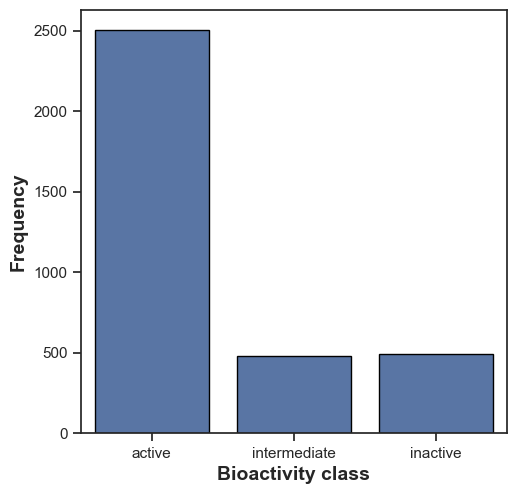

In [78]:
plt.figure(figsize=(5.5,5.5))
sns.countplot(x='bioactivity_class',data=df_final,edgecolor='black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.show()
           

### Scatter plot of MW(molecular weight) vs LogP(solubility)

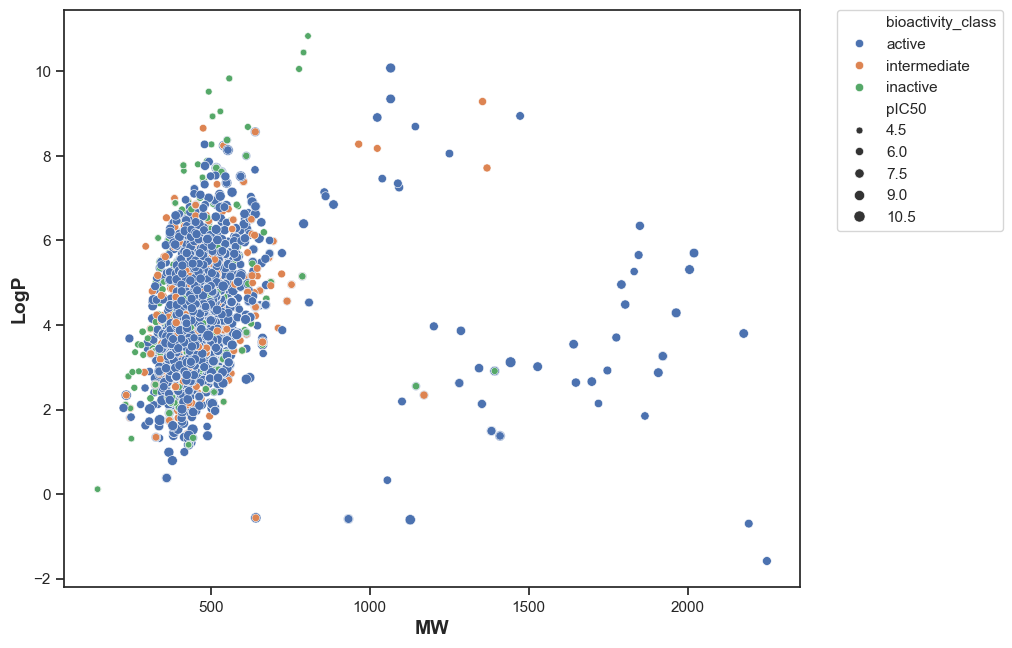

In [92]:
plt.figure(figsize=(9.5,7.5))
sns.scatterplot(x='MW',y='LogP',data=df_final,hue='bioactivity_class',size='pIC50')
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

### Box Plots

#### pIC50

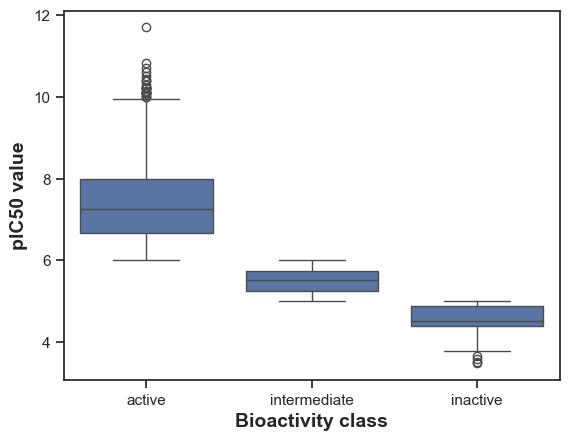

In [89]:
sns.boxplot(x='bioactivity_class',y='pIC50',data=df_final)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.show()

#### **Statistical analysis | Mann-Whitney U Test**

In [95]:
from numpy.random import randn,seed
from scipy.stats import mannwhitneyu


In [112]:
def manwhitney(descriptor, verbose=False):
    try:
        seed(1)
        
        # Select the necessary columns
        selection = [descriptor, 'bioactivity_class']
        df3 = df_final[selection]
        
        # Extract the active class
        active = df3[df3.bioactivity_class == 'active']
        print("Active columns:", active.columns)
        active = active[descriptor]
        print("Selected active descriptor head:", active.head())
        
        # Extract the inactive class
        inactive = df3[df3.bioactivity_class == 'inactive']
        print("Inactive columns:", inactive.columns)
        inactive = inactive[descriptor]
        print("Selected inactive descriptor head:", inactive.head())
        
        # Extract the intermediate class
        intermediate = df3[df3.bioactivity_class == 'intermediate']
        print("Intermediate columns:", intermediate.columns)
        intermediate = intermediate[descriptor]
        print("Selected intermediate descriptor head:", intermediate.head())
        
        # Perform the Mann-Whitney U test
        stat_active_inactive, p_active_inactive = mannwhitneyu(active, inactive)
        stat_active_intermediate, p_active_intermediate = mannwhitneyu(active, intermediate)
        stat_inactive_intermediate, p_inactive_intermediate = mannwhitneyu(inactive, intermediate)
        
        alpha = 0.05
        interpretations = {
            'active_inactive': 'Same distribution (fail to reject H0)' if p_active_inactive > alpha else 'Different distribution (reject H0)',
            'active_intermediate': 'Same distribution (fail to reject H0)' if p_active_intermediate > alpha else 'Different distribution (reject H0)',
            'inactive_intermediate': 'Same distribution (fail to reject H0)' if p_inactive_intermediate > alpha else 'Different distribution (reject H0)'
        }
        
        results = pd.DataFrame({
            'Comparison': ['active_inactive', 'active_intermediate', 'inactive_intermediate'],
            'Statistics': [stat_active_inactive, stat_active_intermediate, stat_inactive_intermediate],
            'p': [p_active_inactive, p_active_intermediate, p_inactive_intermediate],
            'alpha': [alpha, alpha, alpha],
            'Interpretation': [interpretations['active_inactive'], interpretations['active_intermediate'], interpretations['inactive_intermediate']]
        })
        
        filename = 'mannwhitneyu_' + descriptor + '.csv'
        results.to_csv(filename, index=False)
        
        return results
    
    except KeyError as e:
        print(f"KeyError: {e}. Please check if the column '{e.args[0]}' exists in the DataFrame.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [114]:
manwhitney('pIC50')

Active columns: Index(['pIC50', 'bioactivity_class'], dtype='object')
Selected active descriptor head: 0    8.744727
1    9.045757
2    7.879426
3    8.920819
5    8.443697
Name: pIC50, dtype: float64
Inactive columns: Index(['pIC50', 'bioactivity_class'], dtype='object')
Selected inactive descriptor head: 20    4.602060
31    4.823909
32    4.769551
33    4.602060
35    4.823909
Name: pIC50, dtype: float64
Intermediate columns: Index(['pIC50', 'bioactivity_class'], dtype='object')
Selected intermediate descriptor head: 4     5.724919
18    5.301030
25    5.823909
29    5.468521
30    5.795880
Name: pIC50, dtype: float64


,Comparison,Statistics,p,alpha,Interpretation
0,active_inactive,1239480.0,1.544077e-271,0.05,Different distribution (reject H0)
1,active_intermediate,1196912.0,9.333351e-264,0.05,Different distribution (reject H0)
2,inactive_intermediate,0.0,9.892334e-161,0.05,Different distribution (reject H0)


### MW(mol.wt)

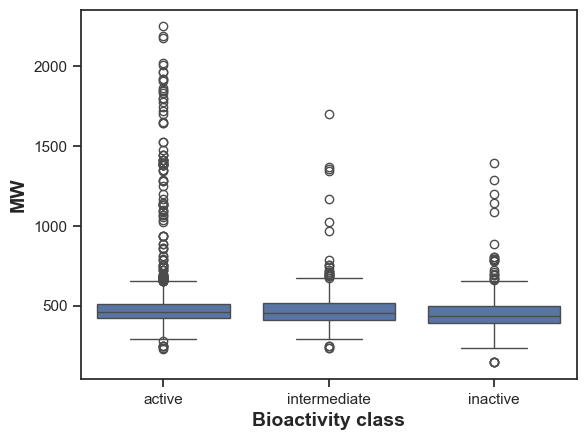

In [115]:
sns.boxplot(x='bioactivity_class',y='MW',data=df_final)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.show()

#### Statistical analysis | Mann-Whitney U Test

In [116]:
manwhitney('MW')

Active columns: Index(['MW', 'bioactivity_class'], dtype='object')
Selected active descriptor head: 0    477.467
1    521.520
2    534.519
3    515.516
5    501.533
Name: MW, dtype: float64
Inactive columns: Index(['MW', 'bioactivity_class'], dtype='object')
Selected inactive descriptor head: 20    472.626
31    432.561
32    464.578
33    446.588
35    494.632
Name: MW, dtype: float64
Intermediate columns: Index(['MW', 'bioactivity_class'], dtype='object')
Selected intermediate descriptor head: 4     530.575
18    458.599
25    440.625
29    446.588
30    460.615
Name: MW, dtype: float64


,Comparison,Statistics,p,alpha,Interpretation
0,active_inactive,728097.5,7.481286e-10,0.05,Different distribution (reject H0)
1,active_intermediate,623414.5,1.479207e-01,0.05,Same distribution (fail to reject H0)
2,inactive_intermediate,103269.5,6.017345e-04,0.05,Different distribution (reject H0)


### LogP

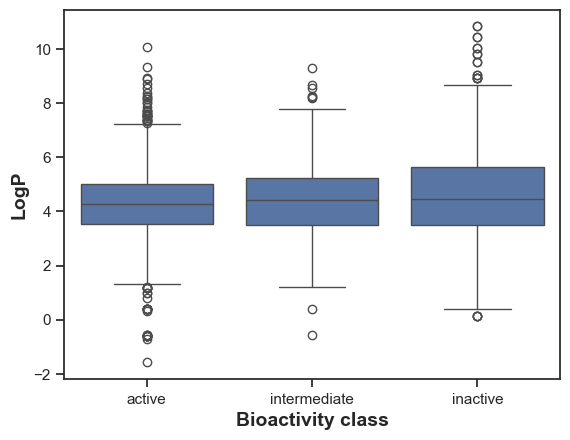

In [117]:
sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.show()

#### Statistical analysis | Mann-Whitney U Test

In [118]:
manwhitney('LogP')

Active columns: Index(['LogP', 'bioactivity_class'], dtype='object')
Selected active descriptor head: 0    3.8041
1    3.1909
2    2.6839
3    4.2061
5    4.2286
Name: LogP, dtype: float64
Inactive columns: Index(['LogP', 'bioactivity_class'], dtype='object')
Selected inactive descriptor head: 20    3.2382
31    2.6607
32    2.8882
33    2.7491
35    3.3358
Name: LogP, dtype: float64
Intermediate columns: Index(['LogP', 'bioactivity_class'], dtype='object')
Selected intermediate descriptor head: 4     3.7278
18    3.2198
25    3.3327
29    2.7491
30    3.1392
Name: LogP, dtype: float64


,Comparison,Statistics,p,alpha,Interpretation
0,active_inactive,552254.5,0.000126,0.05,Different distribution (reject H0)
1,active_intermediate,566279.5,0.062129,0.05,Same distribution (fail to reject H0)
2,inactive_intermediate,125681.5,0.092351,0.05,Same distribution (fail to reject H0)


### NumHDonors

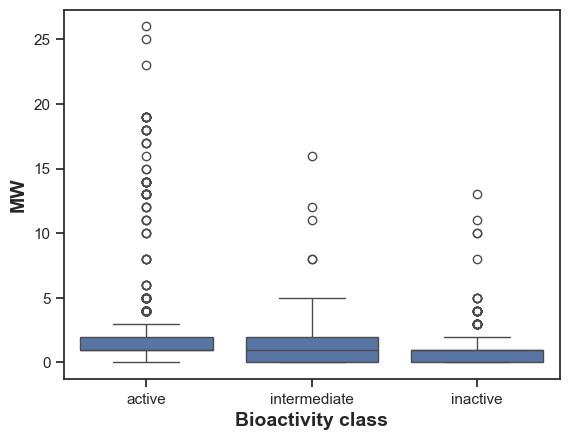

In [119]:
sns.boxplot(x='bioactivity_class',y='NumHDonors',data=df_final)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.show()

#### Statistical analysis | Mann-Whitney U Test

In [120]:
manwhitney('NumHDonors')

Active columns: Index(['NumHDonors', 'bioactivity_class'], dtype='object')
Selected active descriptor head: 0    2.0
1    2.0
2    2.0
3    1.0
5    1.0
Name: NumHDonors, dtype: float64
Inactive columns: Index(['NumHDonors', 'bioactivity_class'], dtype='object')
Selected inactive descriptor head: 20    3.0
31    4.0
32    3.0
33    3.0
35    3.0
Name: NumHDonors, dtype: float64
Intermediate columns: Index(['NumHDonors', 'bioactivity_class'], dtype='object')
Selected intermediate descriptor head: 4     1.0
18    3.0
25    3.0
29    3.0
30    3.0
Name: NumHDonors, dtype: float64


,Comparison,Statistics,p,alpha,Interpretation
0,active_inactive,689483.0,0.000017,0.05,Different distribution (reject H0)
1,active_intermediate,653605.5,0.000607,0.05,Different distribution (reject H0)
2,inactive_intermediate,118106.0,0.960918,0.05,Same distribution (fail to reject H0)


### NumHAcceptors

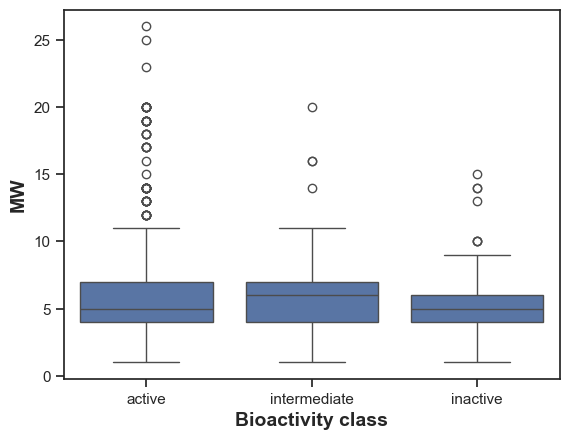

In [122]:
sns.boxplot(x='bioactivity_class',y='NumHAcceptors',data=df_final)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.show()

#### Statistical analysis | Mann-Whitney U Test

In [123]:
manwhitney('NumHAcceptors')

Active columns: Index(['NumHAcceptors', 'bioactivity_class'], dtype='object')
Selected active descriptor head: 0    5.0
1    6.0
2    6.0
3    5.0
5    4.0
Name: NumHAcceptors, dtype: float64
Inactive columns: Index(['NumHAcceptors', 'bioactivity_class'], dtype='object')
Selected inactive descriptor head: 20    5.0
31    4.0
32    5.0
33    5.0
35    5.0
Name: NumHAcceptors, dtype: float64
Intermediate columns: Index(['NumHAcceptors', 'bioactivity_class'], dtype='object')
Selected intermediate descriptor head: 4     4.0
18    5.0
25    5.0
29    5.0
30    5.0
Name: NumHAcceptors, dtype: float64


,Comparison,Statistics,p,alpha,Interpretation
0,active_inactive,741890.0,2.109704e-12,0.05,Different distribution (reject H0)
1,active_intermediate,589555.5,6.014764e-01,0.05,Same distribution (fail to reject H0)
2,inactive_intermediate,95223.5,9.834901e-08,0.05,Different distribution (reject H0)


### Interpretation of Statistical Result

#### Box Plots
**pIC50 values**
Taking a look at pIC50 values, the actives, inactives and intermediates displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives and between are intermediates, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

**Inactive and active are more important than intermediate**

Lipinski's descriptors
Of the 4 Lipinski's descriptors MW, LogP, NumHDonors and NumHAcceptors shows statistically significant difference between actives and inactives.



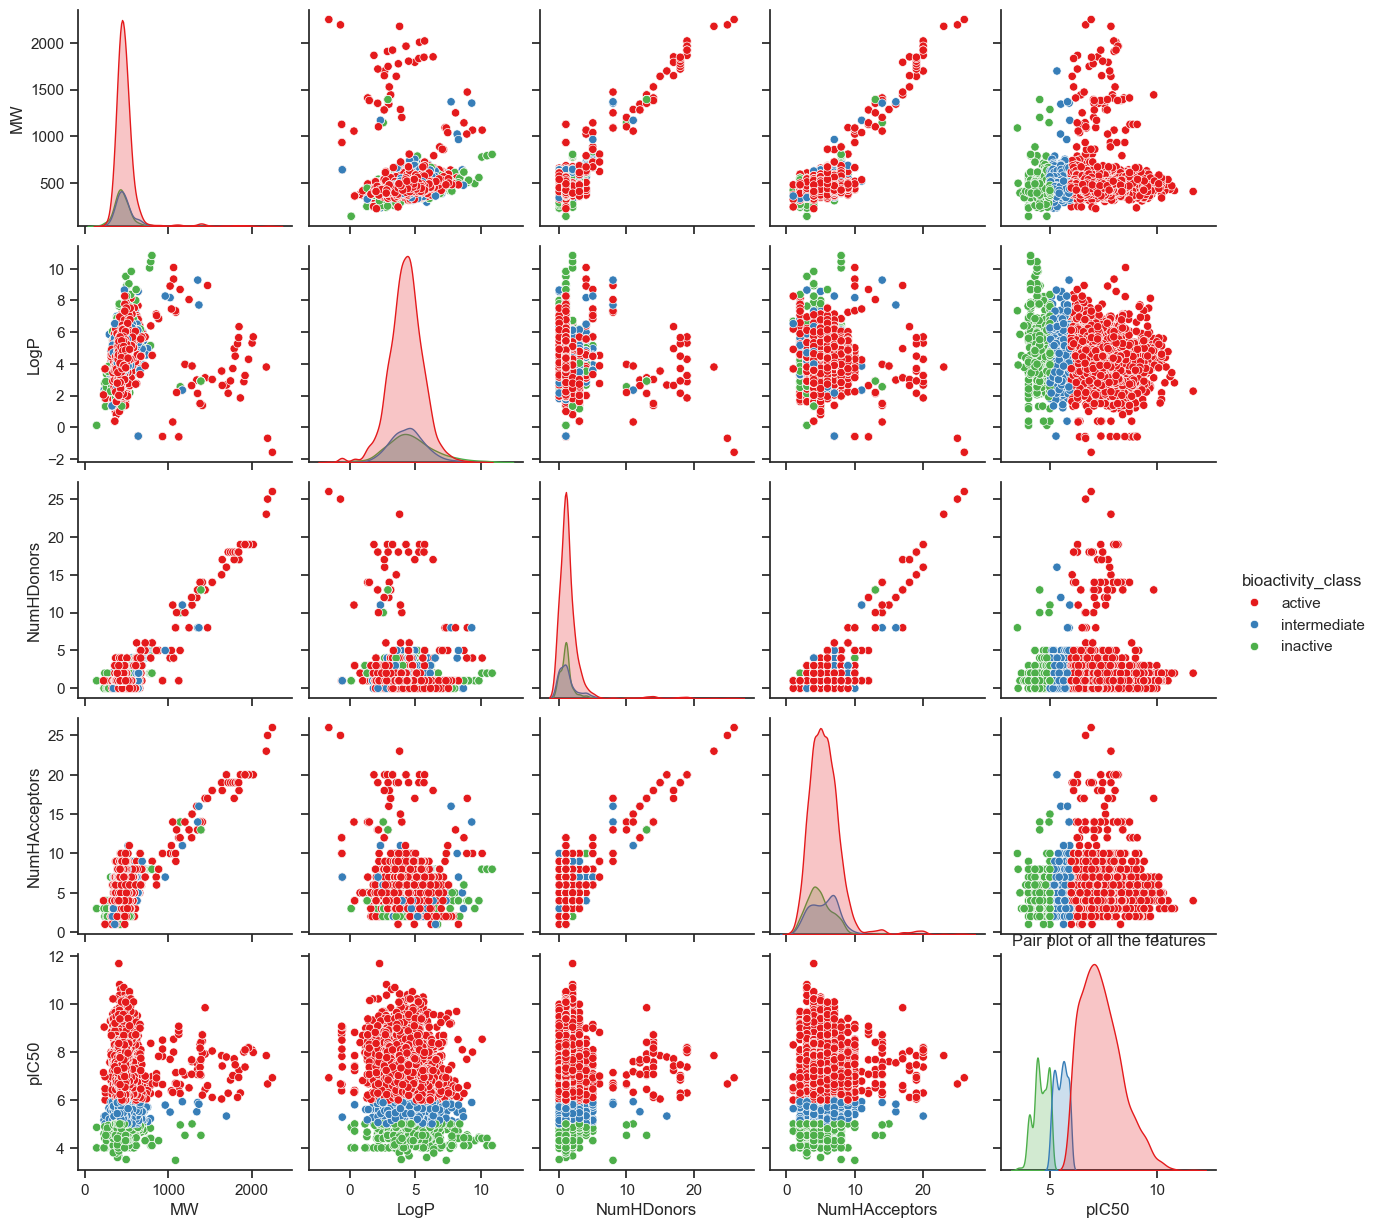

In [134]:
sns.set(style='ticks',palette='Set1')
sns.pairplot(data=df_final,hue='bioactivity_class')
plt.title("Pair plot of all the features")
plt.show()

# Descriptor Calculation and Dataset Preparation

# Model Building

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import r2_score , f1_score ,classification_report, confusion_matrix

from warnings import filterwarnings
filterwarnings('ignore')

### Selecting features for model building

In [4]:
conda install -c conda-forge rdkit


Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-cpp-1.84.0           |       h07eb623_3          16 KB  conda-forge
    cairo-1.18.0               |       h99e66fa_0         865 KB  conda-forge
    libboost-devel-1.84.0      |       h2b186f8_3          39 KB  conda-forge
    libboost-headers-1.84.0    |       h694c41f_3        13.2 MB  conda-forge
    libboost-python-1.84.0     |  py311h49c5ead_4         105 KB  conda-forge
    libzlib-1.2.13             |       h87427d6_6          56 KB  conda-forge
    openssl-3.3.1              |       h87427d6_2         2.4 MB  conda-forge
    rdkit-2024.03.5            |  py311ha2b1ff4_0        34.0 MB  conda-forge
    

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [2]:
df_final=pd.read_csv('alzheimer_data.csv')

### we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset

### Calculate fingerprint descriptors

In [3]:
# Example of how to add a 'smiles' column if it doesn't exist
# data['smiles'] = [...] # Add your SMILES strings here

# Convert SMILES to RDKit molecules
df_final['molecule'] = df_final['canonical_smiles'].apply(Chem.MolFromSmiles)

# Generate PubChem fingerprints
def get_pubchem_fingerprint(mol):
    if mol is None:
        return np.nan
    fp = AllChem.GetMACCSKeysFingerprint(mol)
    arr = np.zeros((1,), dtype=int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

df_final['pubchem_fp'] = df_final['molecule'].apply(get_pubchem_fingerprint)

# Drop rows where the molecule could not be converted to an RDKit object
df_final = df_final.dropna(subset=['pubchem_fp'])


In [4]:
df_final

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50,molecule,pubchem_fp
0,0,CHEMBL336071,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.80,active,477.467,3.80410,2.0,5.0,8.744727,<rdkit.Chem.rdchem.Mol object at 0x13ba33ca0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,CHEMBL336813,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,0.90,active,521.520,3.19090,2.0,6.0,9.045757,<rdkit.Chem.rdchem.Mol object at 0x13ba33c30>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,CHEMBL334594,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,13.20,active,534.519,2.68390,2.0,6.0,7.879426,<rdkit.Chem.rdchem.Mol object at 0x13ba33ae0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,CHEMBL133237,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1.20,active,515.516,4.20610,1.0,5.0,8.920819,<rdkit.Chem.rdchem.Mol object at 0x13ba33e60>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,CHEMBL132900,C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3...,1884.00,intermediate,530.575,3.72780,1.0,4.0,5.724919,<rdkit.Chem.rdchem.Mol object at 0x13ba33ed0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3472,3502,CHEMBL4850178,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,58.00,active,391.742,2.78150,2.0,4.0,7.236572,<rdkit.Chem.rdchem.Mol object at 0x13be13990>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3473,3503,CHEMBL4853450,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,0.80,active,538.929,4.91832,0.0,6.0,9.096910,<rdkit.Chem.rdchem.Mol object at 0x13be13a00>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3474,3504,CHEMBL4851959,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,4.35,active,409.486,2.00890,3.0,4.0,8.361511,<rdkit.Chem.rdchem.Mol object at 0x13be13a70>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3475,3505,CHEMBL4874349,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=...,1.88,active,611.743,2.71720,3.0,6.0,8.725842,<rdkit.Chem.rdchem.Mol object at 0x13be13ae0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [5]:
# Expand the PubChem fingerprints into separate columns
pubchem_fp_df = pd.DataFrame(df_final['pubchem_fp'].to_list(), index=df_final.index)

# Rename the columns to match the desired format (PubchemFP0, PubchemFP1, ..., PubchemFP880)
pubchem_fp_df.columns = [f'PubchemFP{i}' for i in range(pubchem_fp_df.shape[1])]

# Combine the original data (without the 'smiles' and 'molecule' columns) with the new fingerprint columns
data = pd.concat([df_final.drop(columns=['canonical_smiles', 'molecule', 'pubchem_fp']), pubchem_fp_df], axis=1)

# Save the transformed data to a new CSV file
data.to_csv('transformed_data.csv', index=False)

data.head()


,Unnamed: 0,molecule_chembl_id,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50,PubchemFP0,...,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166
0,0,CHEMBL336071,1.8,active,477.467,3.8041,2.0,5.0,8.744727,0,...,1,1,1,1,1,1,1,1,1,0
1,1,CHEMBL336813,0.9,active,521.520,3.1909,2.0,6.0,9.045757,0,...,1,1,1,1,1,1,1,1,1,0
2,2,CHEMBL334594,13.2,active,534.519,2.6839,2.0,6.0,7.879426,0,...,1,1,1,1,1,1,1,1,1,0
3,3,CHEMBL133237,1.2,active,515.516,4.2061,1.0,5.0,8.920819,0,...,0,1,1,1,1,1,1,1,1,0
4,4,CHEMBL132900,1884.0,intermediate,530.575,3.7278,1.0,4.0,5.724919,0,...,0,1,1,1,1,1,1,1,1,0


In [6]:
data.columns

Index(['Unnamed: 0', 'molecule_chembl_id', 'standard_value',
       'bioactivity_class', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors',
       'pIC50', 'PubchemFP0',
       ...
       'PubchemFP157', 'PubchemFP158', 'PubchemFP159', 'PubchemFP160',
       'PubchemFP161', 'PubchemFP162', 'PubchemFP163', 'PubchemFP164',
       'PubchemFP165', 'PubchemFP166'],
      dtype='object', length=176)

In [7]:
data.head(5).to_csv('descriptor_output.csv')

In [17]:
df9=data.drop(['Unnamed: 0', 'molecule_chembl_id', 'standard_value','bioactivity_class', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors','molecules'],axis=1)


In [18]:
df9

,pIC50,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166
0,8.744727,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,9.045757,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,7.879426,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,8.920819,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
4,5.724919,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,7.236572,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3473,9.096910,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3474,8.361511,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3475,8.725842,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


### Splitting the DataFrame

In [22]:
X=df9.drop(['pIC50'],axis=1)
y=df9.pIC50

In [23]:
X.head(2)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


### Train Test Split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=0)

print('X_train.shape:',X_train.shape, ' X_test.shape:',X_test.shape,'y_train.shape:', y_train.shape,'y_test.shape', y_test.shape)

X_train.shape: (2433, 167)  X_test.shape: (1044, 167) y_train.shape: (2433,) y_test.shape (1044,)


### Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [26]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.23951276,
         0.        , -0.19371797],
       [ 0.        ,  0.        ,  0.        , ...,  0.23951276,
         0.        , -0.19371797],
       [ 0.        ,  0.        ,  0.        , ...,  0.23951276,
         0.        , -0.19371797],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.23951276,
         0.        , -0.19371797],
       [ 0.        ,  0.        ,  0.        , ...,  0.23951276,
         0.        , -0.19371797],
       [ 0.        ,  0.        ,  0.        , ...,  0.23951276,
         0.        , -0.19371797]])

In [27]:
from sklearn.linear_model import Ridge

# Train a Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Evaluate the model
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.9679782738148495


### Linear Regression

In [58]:
# Define your features and target
X = df9.drop(columns=['pIC50'])
y = df9['pIC50']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2_lr = 1 - (1 - r2_lr) * ((n - 1) / (n - p - 1))

print(f"Linear Regression - MSE: {mse_lr:.4f},MAE: {mae_lr},")
print(f"Linear Regression - , R^2: {r2_lr:.4f},Adjusted R^2 Score: {adj_r2_lr}")



# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2_ridge = 1 - (1 - r2_ridge) * ((n - 1) / (n - p - 1))


print(f"Ridge Regression - MSE: {mse_ridge:.4f},MAE: {mae_ridge},")
print(f"Ridge Regression - , R^2: {r2_ridge:.4f},Adjusted R^2 Score: {adj_r2_ridge}")

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2_lasso = 1 - (1 - r2_lasso) * ((n - 1) / (n - p - 1))

print(f"Lasso Regression - MSE: {mse_lasso:.4f},MAE: {mae_lasso},")
print(f"Lasso Regression - , R^2: {r2_lasso:.4f},Adjusted R^2 Score: {adj_r2_lasso}")

Linear Regression - MSE: 1.0401,MAE: 0.8019766858877899,
Linear Regression - , R^2: 0.4484,Adjusted R^2 Score: 0.2738731175307164
Ridge Regression - MSE: 1.0323,MAE: 0.7967842744950315,
Ridge Regression - , R^2: 0.4525,Adjusted R^2 Score: 0.2793791040139332
Lasso Regression - MSE: 1.5066,MAE: 0.9975513018887643,
Lasso Regression - , R^2: 0.2010,Adjusted R^2 Score: -0.051750165376116986


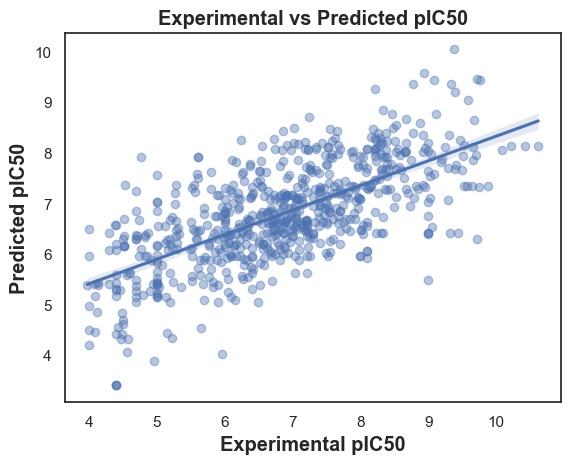

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the actual and predicted values respectively
sns.set(color_codes=True)
sns.set_style("white")

# Correct the order of arguments: x should be the first argument (y_test) and y should be the second argument (y_pred_ridge)
ax = sns.regplot(x=y_test, y=y_pred_ridge, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
plt.title('Experimental vs Predicted pIC50', fontsize='large', fontweight='bold')
plt.show()


## Random Forest


In [62]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for Ridge, Lasso, and Random Forest regression
parameters_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

parameters_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

parameters_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Create Ridge, Lasso, and Random Forest regression instances
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation for Ridge regression
grid_search_ridge = GridSearchCV(ridge, parameters_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)

# Perform grid search with cross-validation for Lasso regression
grid_search_lasso = GridSearchCV(lasso, parameters_lasso, cv=5)
grid_search_lasso.fit(X_train, y_train)

# Perform grid search with cross-validation for Random Forest regression
grid_search_rf = GridSearchCV(rf, parameters_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and scores for Ridge regression
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

# Get the best parameters and scores for Lasso regression
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

# Get the best parameters and scores for Random Forest regression
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Print the results
print("Best Hyperparameters for Ridge Regression: ", best_params_ridge)
print("Best Score for Ridge Regression: ", best_score_ridge)

print("Best Hyperparameters for Lasso Regression: ", best_params_lasso)
print("Best Score for Lasso Regression: ", best_score_lasso)

print("Best Hyperparameters for Random Forest Regression: ", best_params_rf)
print("Best Score for Random Forest Regression: ", best_score_rf)

# Choose the model with the best score
if best_score_ridge > best_score_lasso and best_score_ridge > best_score_rf:
    best_model = Ridge(**best_params_ridge)
    print("Best Model: Ridge Regression")
elif best_score_lasso > best_score_ridge and best_score_lasso > best_score_rf:
    best_model = Lasso(**best_params_lasso)
    print("Best Model: Lasso Regression")
else:
    best_model = RandomForestRegressor(**best_params_rf)
    print("Best Model: Random Forest Regression")

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

y_pred_rf = best_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate Adjusted R^2
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2_rf = 1 - (1 - r2_rf) * ((n - 1) / (n - p - 1))

print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R^2 Score: {r2_rf}')
print(f'Adjusted R^2 Score: {adj_r2_rf}')


Best Hyperparameters for Ridge Regression:  {'alpha': 10}
Best Score for Ridge Regression:  0.4723918143986891
Best Hyperparameters for Lasso Regression:  {'alpha': 0.01}
Best Score for Lasso Regression:  0.4256286942165303
Best Hyperparameters for Random Forest Regression:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Score for Random Forest Regression:  0.5982147366743261
Best Model: Random Forest Regression
Mean Absolute Error: 0.6638118659115777
Mean Squared Error: 0.7553240330066798
R^2 Score: 0.5994076733110528
Adjusted R^2 Score: 0.4727051760439047


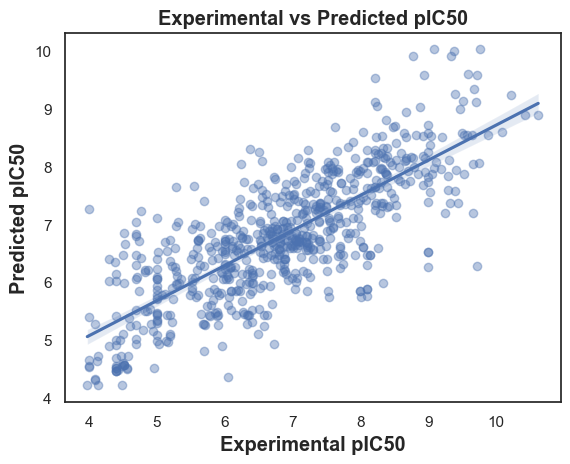

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the actual and predicted values respectively
sns.set(color_codes=True)
sns.set_style("white")

# Correct the order of arguments: x should be the first argument (y_test) and y should be the second argument (y_pred_ridge)
ax = sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
plt.title('Experimental vs Predicted pIC50', fontsize='large', fontweight='bold')
plt.show()


## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for Decision Tree regression
parameters_tree = {
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Create a DecisionTreeRegressor instance
tree = DecisionTreeRegressor()

# Perform grid search with cross-validation for Decision Tree regression
grid_search_tree = GridSearchCV(tree, parameters_tree, cv=5)
grid_search_tree.fit(X_train, y_train)

# Get the best parameters and scores for Decision Tree regression
best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_

# Print the results
print("Best Hyperparameters for Decision Tree Regression: ", best_params_tree)
print("Best Score for Decision Tree Regression: ", best_score_tree)

best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_dt = best_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate Adjusted R^2
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2_dt = 1 - (1 - r2_dt) * ((n - 1) / (n - p - 1))

print(f'Mean Absolute Error: {mae_dt}')
print(f'Mean Squared Error: {mse_dt}')
print(f'R^2 Score: {r2_dt}')
print(f'Adjusted R^2 Score: {adj_r2_dt}')


Best Hyperparameters for Decision Tree Regression:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score for Decision Tree Regression:  0.507551456668251
Mean Absolute Error: 0.6630507904920416
Mean Squared Error: 0.7539959512391605
R^2 Score: 0.6001120324232155
Adjusted R^2 Score: 0.4736323154055583


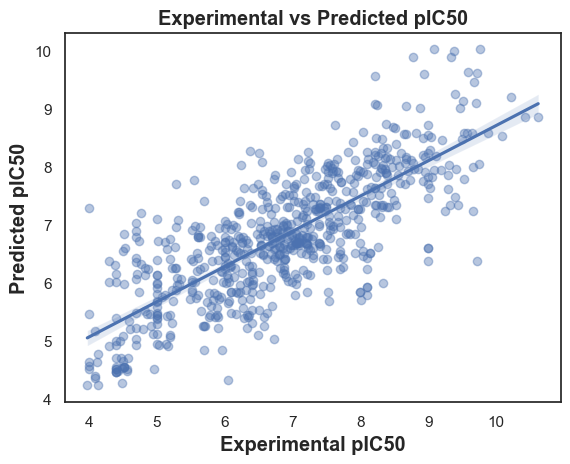

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the actual and predicted values respectively
sns.set(color_codes=True)
sns.set_style("white")

# Correct the order of arguments: x should be the first argument (y_test) and y should be the second argument (y_pred_ridge)
ax = sns.regplot(x=y_test, y=y_pred_dt, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
plt.title('Experimental vs Predicted pIC50', fontsize='large', fontweight='bold')
plt.show()


## SVM

In [71]:
from sklearn.svm import SVR

# Define the parameter grid for SVM regression
parameters_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5],  # Epsilon in the epsilon-SVR model
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type to be used in the algorithm
    'degree': [2, 3, 4]  # Degree of the polynomial kernel function (if kernel='poly')
}

# Create an SVR instance
svm = SVR()

# Perform grid search with cross-validation for SVM regression
grid_search_svm = GridSearchCV(svm, parameters_svm, cv=5)
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and scores for SVM regression
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

# Print the results
print("Best Hyperparameters for SVM Regression: ", best_params_svm)
print("Best Score for SVM Regression: ", best_score_svm)

best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_svm = best_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Calculate Adjusted R^2
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2_svm = 1 - (1 - r2_svm) * ((n - 1) / (n - p - 1))

print(f'Mean Absolute Error: {mae_svm}')
print(f'Mean Squared Error: {mse_svm}')
print(f'R^2 Score: {r2_svm}')
print(f'Adjusted R^2 Score: {adj_r2_svm}')

Best Hyperparameters for SVM Regression:  {'C': 10, 'degree': 2, 'epsilon': 0.5, 'kernel': 'rbf'}
Best Score for SVM Regression:  0.6086026326996402
Mean Absolute Error: 0.6600884274594916
Mean Squared Error: 0.7494238729871925
R^2 Score: 0.6025368718096562
Adjusted R^2 Score: 0.4768241020979376


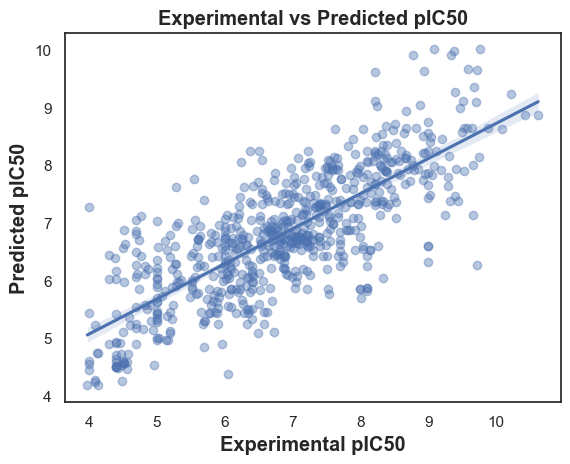

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the actual and predicted values respectively
sns.set(color_codes=True)
sns.set_style("white")

# Correct the order of arguments: x should be the first argument (y_test) and y should be the second argument (y_pred_ridge)
ax = sns.regplot(x=y_test, y=y_pred_svm, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
plt.title('Experimental vs Predicted pIC50', fontsize='large', fontweight='bold')
plt.show()


## KNN

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN regression
parameters_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Create a KNeighborsRegressor instance
knn = KNeighborsRegressor()

# Perform grid search with cross-validation for KNN regression
grid_search_knn = GridSearchCV(knn, parameters_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and scores for KNN regression
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

# Print the results
print("Best Hyperparameters for KNN Regression: ", best_params_knn)
print("Best Score for KNN Regression: ", best_score_knn)

best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_knn = best_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Calculate Adjusted R^2
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2_knn = 1 - (1 - r2_knn) * ((n - 1) / (n - p - 1))

print(f'Mean Absolute Error: {mae_knn}')
print(f'Mean Squared Error: {mse_knn}')
print(f'R^2 Score: {r2_knn}')
print(f'Adjusted R^2 Score: {adj_r2_knn}')


Best Hyperparameters for KNN Regression:  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Score for KNN Regression:  0.5855417881421697
Mean Absolute Error: 0.6613130265116769
Mean Squared Error: 0.7498643477136678
R^2 Score: 0.6023032624078422
Adjusted R^2 Score: 0.47651660487395886


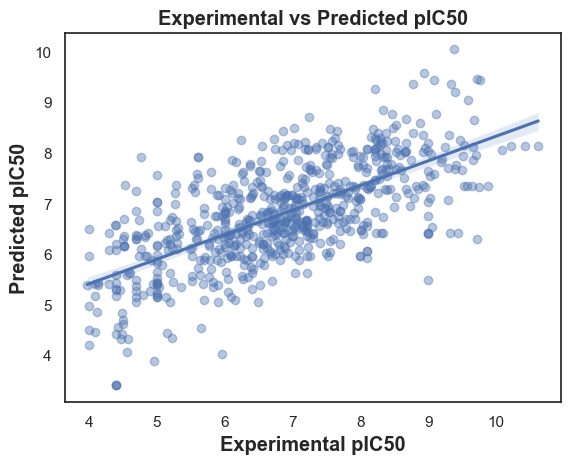

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the actual and predicted values respectively
sns.set(color_codes=True)
sns.set_style("white")

# Correct the order of arguments: x should be the first argument (y_test) and y should be the second argument (y_pred_ridge)
ax = sns.regplot(x=y_test, y=y_pred_ridge, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
plt.title('Experimental vs Predicted pIC50', fontsize='large', fontweight='bold')
plt.show()


### Comparing all models

In [75]:
import pandas as pd

# Create a DataFrame for comparison
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN'],
    'MSE': [mse_lr, mse_dt, mse_rf, mse, mse],
    'R^2': [r2_lr, r2_dt, r2_rf, r2, r2]
})

print(results)


               Model       MSE       R^2
0  Linear Regression  1.040141  0.448353
1      Decision Tree  0.753996  0.600112
2      Random Forest  0.755324  0.599408
3                SVM  0.747716  0.603443
4                KNN  0.747716  0.603443


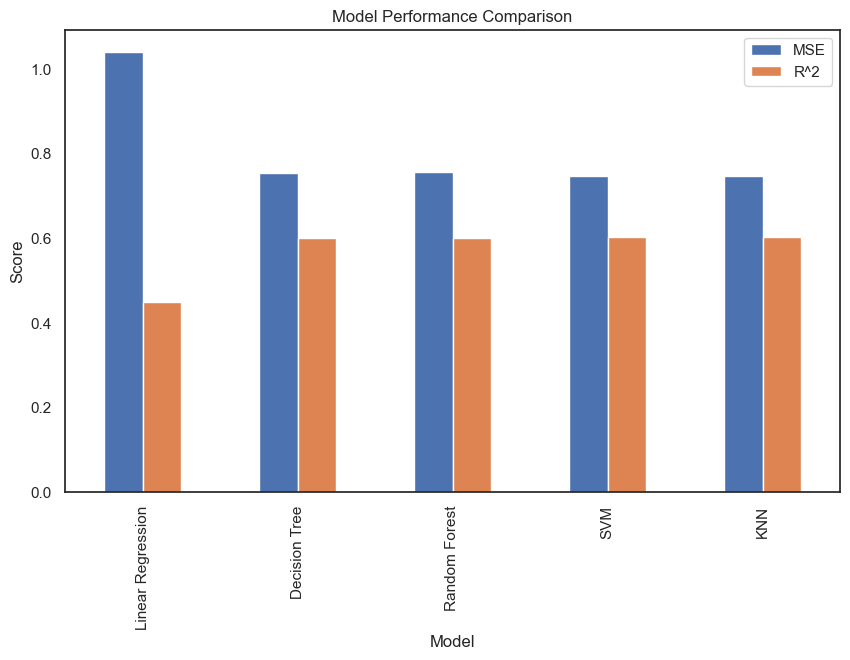

In [76]:
import matplotlib.pyplot as plt

results.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()


#### Deployment of the Alzheimer's bioactivity prediction model is implemented in a .py file using Streamlit for an interactive web application.